## For this assignment, we will be working with a modified version of weather data from London from Kaggle. 

The assignment is split into 3 parts:

Part 1: Load the data and create a datetime index

Part 2: Answer 2 Questions using Visualizations and the Correct Frequency Data

## Part 1) Load the data and make a datetime index.
- Use the modified version of the data provided here:
- Share URL: https://docs.google.com/spreadsheets/d/1J2hEGA1-ZOdXOc1Go2AjB7xShq-nAvIDpBz_XRZscHU/edit?usp=sharing
- Raw URL:
https://docs.google.com/spreadsheets/d/e/2PACX-1vT_jChgNsQbHbg4TGepzIqk8XC9DTIKmyyxb1upo5cfZCgbfIUQc2ZC0YMzuU5uApP140Ob49KBjdqh/pub?gid=1198589591&single=true&output=csv 
- We must first load in the data and create a datetime index.

1. Convert the date column to datetime dtype.
2. Set the date column as the index.
3. Filter out only the required data:
 - Keep only data from the year 2000 or later.
 - Keep only the following features:
   - precipitation
   - mean_temp
   - min_temp
   - max_temp
   - snow_depth
4. Impute any missing values.
 - Think about each feature and what imputation method makes sense. You may not be able to use the same method for every feature!

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticks

import missingno as miss

import seaborn as sns
import numpy as np

In [13]:
url ='https://docs.google.com/spreadsheets/d/e/2PACX-1vT_jChgNsQbHbg4TGepzIqk8XC9DTIKmyyxb1upo5cfZCgbfIUQc2ZC0YMzuU5uApP140Ob49KBjdqh/pub?gid=1198589591&single=true&output=csv '
df = pd.read_csv(url)
df

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...,...
15336,20201227,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
15337,20201228,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
15338,20201229,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN
15339,20201230,6.0,0.4,22.0,5.6,2.7,-0.1,0.0,100200.0,NaN


In [14]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
df['date']

0       1979-01-01
1       1979-01-02
2       1979-01-03
3       1979-01-04
4       1979-01-05
           ...    
15336   2020-12-27
15337   2020-12-28
15338   2020-12-29
15339   2020-12-30
15340   2020-12-31
Name: date, Length: 15341, dtype: datetime64[ns]

In [15]:
df = df.set_index('date')
df

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,
1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...
2020-12-27,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
2020-12-28,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
2020-12-29,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN


In [16]:
# Filter out only the required data: Keep only data from the year 2000 or later. Keep only the following features:
# precipitation
# mean_temp
# min_temp
# max_temp
# snow_depth

df = df.loc['2000':, ['precipitation', 'mean_temp', 'min_temp', 'max_temp', 'snow_depth']]
df

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2000-01-01,0.0,7.0,4.9,10.8,0.0
2000-01-02,0.2,7.9,5.0,11.5,0.0
2000-01-03,6.0,9.4,7.2,9.5,0.0
2000-01-04,0.2,7.0,4.4,11.0,0.0
2000-01-05,0.8,6.4,1.9,10.8,0.0
...,...,...,...,...,...
2020-12-27,2.0,7.5,7.6,7.5,NaN
2020-12-28,0.2,1.1,-1.3,3.6,NaN
2020-12-29,0.0,2.6,1.1,4.1,NaN


In [18]:
# Impute any missing values.
df.isna().sum()

precipitation     390
mean_temp         419
min_temp          386
max_temp          390
snow_depth       1752
dtype: int64

In [19]:
## interpolating temperature measures
df['mean_temp'] = df['mean_temp'].interpolate()
df['max_temp'] = df['max_temp'].interpolate()
df['min_temp'] = df['min_temp'].interpolate()

In [20]:
df.isna().sum()

precipitation     390
mean_temp           0
min_temp            0
max_temp            0
snow_depth       1752
dtype: int64

In [21]:
# filling preciptation/snow with 0
df['precipitation'] = df['precipitation'].fillna(0)
df['snow_depth'] = df['snow_depth'].fillna(0)

In [22]:
df.isna().sum()

precipitation    0
mean_temp        0
min_temp         0
max_temp         0
snow_depth       0
dtype: int64

# Part 2) Answer the Questions with Visualizations (Using the Correct Frequency)
- For each of the following questions, make a new copy of the dataframe resampled to the correct frequency for the question.
- Plot the feature that the question is asking about.
  - If there is a specific time period, plot only that time period.
  
Note: you may want to make a temporary DataFrame that you will use to answer this question only.

## Q1: What month had the most precipitation between 2000 through 2010?
- Resample the data as Monthly frequency.
- Find the date and corresponding value for the max precipitation.
- Plot the feature and time period that corresponds to the question.
  - Make sure to meet the "Visualization Requirements" below!
- Determine the date and value for the most precipitation (the max precipitation).
- Add a vertical line at this date with a label that says the date (using date format: "April 2000") and the max precipitation value.
  - Make sure to add a legend so that your label is visible
  
## Visualization Issue Workaround
NOTE: Pandas' .plot method currently has a bug with 4-digit year axis labels. The tick labels misbehave when being formatted with matplotlib and will produce a mostly-blank axis with 1 year labeled, like the screenshot below:


- To get around this issue, first create your fig and ax using plt.subplots() 

  - Now you may use pandas .plot method to plot onto this figure by adding "ax=ax" to .plot. 
fig, ax = plt.subplots(figsize=(12,3))
df.plot(ax=ax)copy

*fig, ax = plt.suplots(figsize=(12,3))
df.plot(ax=ax)*

## Q1 Visualization Requirements
- Use a combination of pandas, matplotlib tick formatters, tick locators, and the fig.autofmt_xdate method to:
  - Create a wide figure (e.g. figsize=(12,3))
    - With a title of "Precipitation for 2000-2010"
    - With a ylabel of "Inches"
- Customize the major xaxis ticks to:
  - Have major xaxis ticks every 1 year.
  - Use 4-digit years for the labels
  - Have the major ticks' labels rotated 90 degrees.
- Customize the minor xaxis ticks to:
  - Have minor xaxis ticks every 3 months
  - Do not label the minor ticks.
  
## Q2: Which year between 2000-2020 had the coolest average temperature?
- Resample the data as Yearly frequency.

- Find the date and corresponding value for the max mean temp.

- Plot the feature and time period that corresponds to the question.

  - Make sure to meet the "Visualization Requirements" below!
- Determine the date and value for the lowest mean temp.

- Add a vertical line at this date with a label that says the date (using date format: "2000") and the max precipitation value.

- and what was the temperature?



## Q2 Visualization Requirements
- Use a combination of pandas, matplotlib tick formatters, tick locators, and the fig.autofmt_xdate method to:
  - Create a wide figure (e.g. figsize=(12,3))
    - With a title of "Average Temperature"
    - With a ylabel of "Degrees"
- Customize the major xaxis ticks to:
  - Have major xaxis ticks every 5 years.
  - Use 4-digit years for the labels
  - Have the major ticks' labels rotated 90 degrees.
- Customize the minor xaxis ticks to:
  - Have minor xaxis ticks every 1 year
  - Do not label the minor ticks.

## Q1: What month had the most precipitation between 2000 through 2010?

In [23]:
ts = df['precipitation'].loc['2000':'2010'].copy()
ts


date
2000-01-01    0.0
2000-01-02    0.2
2000-01-03    6.0
2000-01-04    0.2
2000-01-05    0.8
             ... 
2010-12-27    5.0
2010-12-28    0.4
2010-12-29    1.4
2010-12-30    0.0
2010-12-31    0.0
Name: precipitation, Length: 4018, dtype: float64

In [52]:
# Resample the data as Monthly frequency.
ts_M = ts.resample("M").last()
ts_M

date
2000-01-31    0.0
2000-02-29    5.6
2000-03-31    0.0
2000-04-30    0.0
2000-05-31    1.4
             ... 
2010-08-31    0.0
2010-09-30    1.8
2010-10-31    3.4
2010-11-30    0.6
2010-12-31    0.0
Freq: M, Name: precipitation, Length: 132, dtype: float64

In [127]:
# Find the date and corresponding value for the max precipitation.
date_most_precip = ts_M.idxmax()
date_most_precip

Timestamp('2002-04-30 00:00:00', freq='M')

In [128]:
# Max Precipitation
max_precip = ts_M.loc[ date_most_precip]
max_precip

13.8

## Plotting Q1

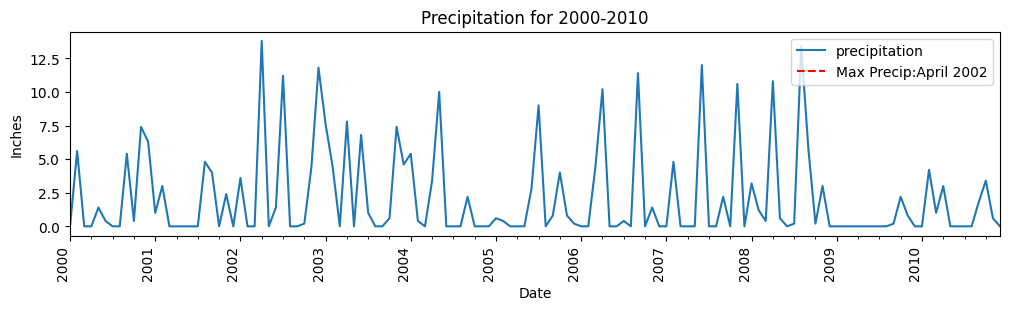

In [158]:

fig, ax = plt.subplots(figsize=(12,3))
ts_M.plot(ax=ax)
ax.set(title='Precipitation for 2000-2010', ylabel='Inches', xlabel='Date')

# customize major ticks 
major_loc =  mdates.YearLocator(1)
major_fmt = mdates.DateFormatter("%Y")

# customize minor ticks
minor_loc =  mdates.MonthLocator(interval=3)

## Final xdate tweaks
fig = ax.get_figure()
fig.autofmt_xdate(which='major',rotation=90)

ax.axvline(max_precip, ls='--',color='red',label='Max Precip:April 2002')
ax.legend(loc='upper right');


## Q2: Which year between 2000-2020 had the coolest average temperature?

In [95]:
ts2 = df['mean_temp'].loc['2000':'2020'].copy()
ts2

date
2000-01-01    7.0
2000-01-02    7.9
2000-01-03    9.4
2000-01-04    7.0
2000-01-05    6.4
             ... 
2020-12-27    7.5
2020-12-28    1.1
2020-12-29    2.6
2020-12-30    2.7
2020-12-31   -0.8
Name: mean_temp, Length: 7671, dtype: float64

In [110]:
# Resample the data as Yearly frequency.
ts2_Y = ts2.resample("Y").last()
ts2_Y

date
2000-12-31     2.8
2001-12-31     1.0
2002-12-31     7.3
2003-12-31     3.3
2004-12-31    10.6
2005-12-31     5.4
2006-12-31     8.7
2007-12-31     6.7
2008-12-31    -0.8
2009-12-31     3.9
2010-12-31     5.9
2011-12-31     9.2
2012-12-31     8.6
2013-12-31     8.0
2014-12-31     2.2
2015-12-31     9.5
2016-12-31     4.6
2017-12-31    10.3
2018-12-31     9.4
2019-12-31     7.1
2020-12-31    -0.8
Freq: A-DEC, Name: mean_temp, dtype: float64

In [111]:
# Find the date and corresponding value for the Max Mean Temp.
date_max_mean_temp = ts2_Y.idxmax()
date_max_mean_temp

Timestamp('2004-12-31 00:00:00', freq='A-DEC')

In [160]:
# Max Mean Temp
max_mean_temp=ts2_Y.loc[ date_max_mean_temp]
max_mean_temp

10.6

In [164]:
# Min Mean Temp
date_min_mean_temp = ts2_Y.idxmin()
date_min_mean_temp

Timestamp('2008-12-31 00:00:00', freq='A-DEC')

In [165]:
min_mean_temp=ts2_Y.loc[ date_min_mean_temp]
min_mean_temp

-0.8

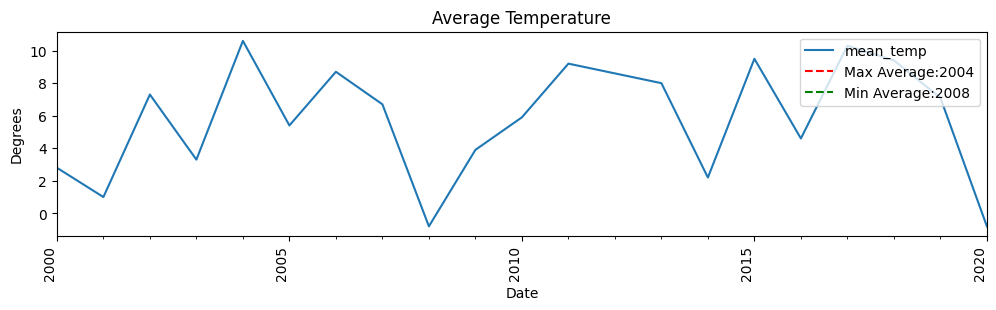

In [169]:
fig, ax = plt.subplots(figsize=(12,3))
ts2_Y.plot(ax=ax)

ax.set(title='Average Temperature', ylabel='Degrees', xlabel='Date')

# customize major ticks 
major_loc =  mdates.YearLocator(5)
major_fmt = mdates.DateFormatter("%Y")

# customize minor ticks
minor_loc =  mdates.MonthLocator(interval=1)

## Final xdate tweaks
fig = ax.get_figure()
fig.autofmt_xdate(which='major',rotation=90)

ax.axvline(max_mean_temp,ls='--',color='red',label='Max Average:2004')
ax.axvline(min_mean_temp,ls='--',color='green', label='Min Average:2008')
ax.legend(loc='upper right');